## Statistical Computing Final Project
Megan Mattingly
12-7-25

### Introduction
One way that Regork incentivizes customers to shop at their stores is by offering coupons. If this incentive is successful, then Regork earns more revenue, so it is important to understand how and when customers are using coupons. Once we have this understanding, we can better market towards certain segments and grow Regork's business. Some questions we will be exploring as part of this analysis include: Which demographic groups are redeeming the most coupons? When are the most coupons redeemed? Do customers redeeming coupons tend to spend more overall? 

To accomplish this task, we used the transactions, demographics, and coupon redemptions data sets. They were joined together and aggregated in different ways in order to determine trends in coupon usage among customers. Based on our results, we determined that coupons should be offered more often, specifically on products that appeal to younger customers and families. Also, Regork can boost sales by offering coupons at slower times of the year. 

### Loading Packages and Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from completejourney_py import get_data

cj_data = get_data()
transactions = cj_data['transactions']
demographics = cj_data['demographics']
coupon_redemptions = cj_data['coupon_redemptions']

The Python libraries and data sets used for our analysis are shown above. The pandas and numpy packages are used for data manipulation and aggregation, while the matplotlib and seaborn packages are used to create visualizations. The completejourney_py package contains the data used for this project. The transactions data set contains information about items that were purchased by a specific household during a shopping trip, the demographics data set contains household demographic data, and the coupon redemptions data set contains information about which households redeemed couponds and on which day.  

### Coupon Redemptions Per Demographic Group
In order to determine which of Regork's customers are redeeming coupons most often, we looked at the number of coupon redemptions across three demographic groups: age, income level, and household size. First, we joined the three data sets based on household ID and date in order to aggregate the data properly. Then, we visualized the data in order to easily compare the number of coupon redemptions within each group.  


In [43]:
#Reformatting date field for joining data
transactions['date'] = transactions['transaction_timestamp'].dt.normalize()

#Join transactions and coupon redemptions data based on household ID and date
transactions_w_coupon_info = transactions.merge(coupon_redemptions, 
                                            left_on = ('household_id', 'date'),
                                            right_on = ('household_id', 'redemption_date'),
                                            how = 'left')

#Join with demographics data based on household ID
coupons_w_demographics = transactions_w_coupon_info.merge(demographics, 
                                                      on = 'household_id',
                                                      how = 'left')

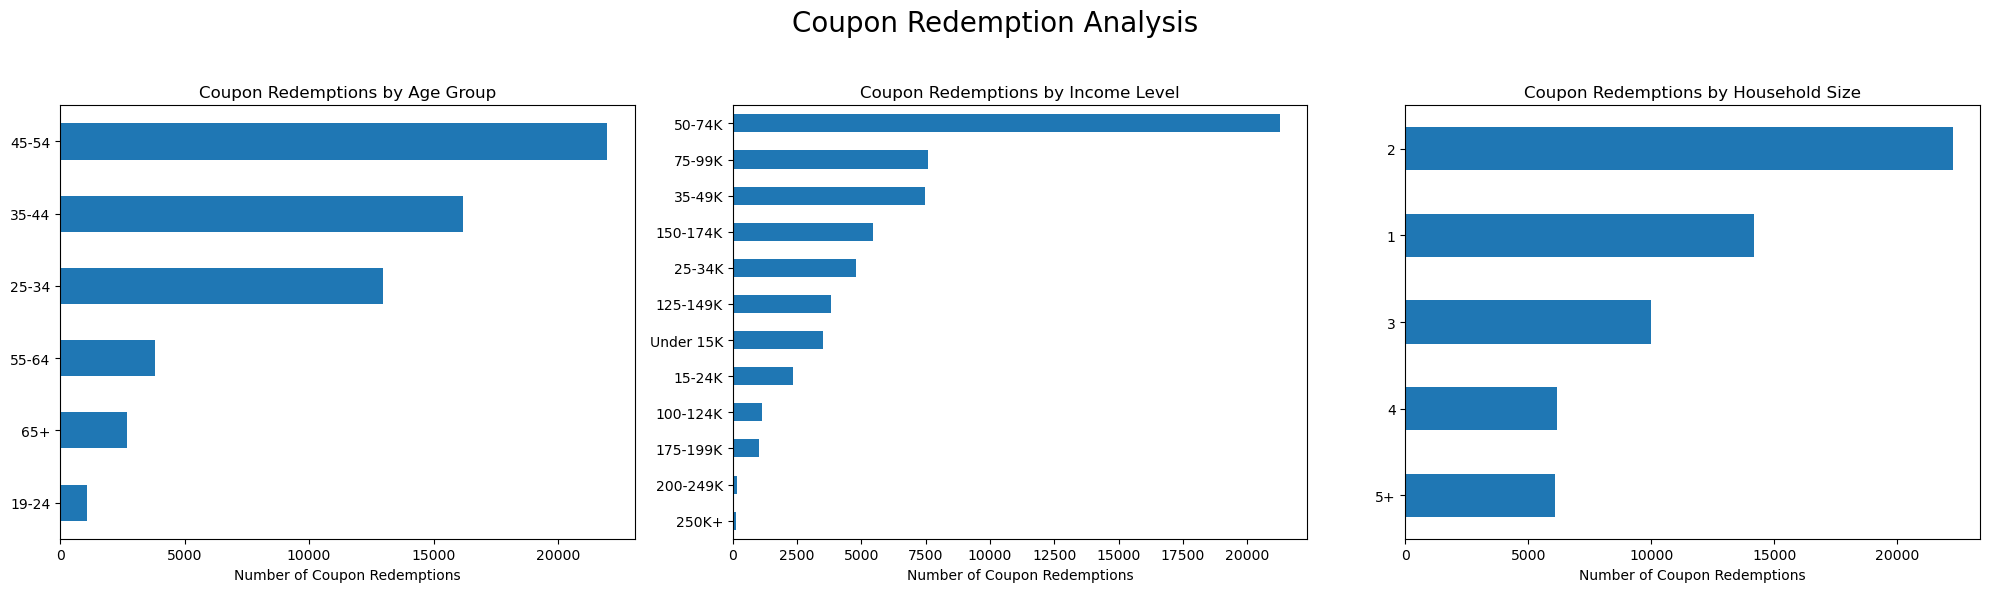

In [48]:
#Calculate which age group had the most coupon redemptions
redemptions_by_age = coupons_w_demographics.groupby('age').agg({'redemption_date': 'count'}).sort_values(by='redemption_date', ascending=False)

#Calculate which income level had the most coupon redemptions
redemptions_by_income = coupons_w_demographics.groupby('income').agg({'redemption_date': 'count'}).sort_values(by='redemption_date', ascending=False)

#Calculate which household size had the most coupon redemptions
redemptions_by_hshld_size = coupons_w_demographics.groupby('household_size').agg({'redemption_date': 'count'}).sort_values(by='redemption_date', ascending=False)

# Create a single row with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#Age group plot
redemptions_by_age.plot.barh(legend=False, ax=axes[0])
axes[0].set_title("Coupon Redemptions by Age Group", fontsize=12)
axes[0].set_xlabel("Number of Coupon Redemptions")
axes[0].set_ylabel(None)
axes[0].invert_yaxis()

#Income level plot
redemptions_by_income.plot.barh(legend=False, ax=axes[1])
axes[1].set_title("Coupon Redemptions by Income Level", fontsize=12)
axes[1].set_xlabel("Number of Coupon Redemptions")
axes[1].set_ylabel(None)
axes[1].invert_yaxis()

#Household size plot
redemptions_by_hshld_size.plot.barh(legend=False, ax=axes[2])
axes[2].set_title("Coupon Redemptions by Household Size", fontsize=12)
axes[2].set_xlabel("Number of Coupon Redemptions")
axes[2].set_ylabel(None)
axes[2].invert_yaxis()

# Adjust overall layout
plt.suptitle("Coupon Redemption Analysis", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the age chart, we can see that 45-54 year olds redeem the most coupons, with over 20,000 total redemptions. This means that Regork's coupons are very effective with this age group. However, the youngest age group in the data, 19-24 year olds, redeems the fewest coupons. Since Regork's youngest customers are the ones not using coupons, this could be an opportunity to reevaluate what products we are offering coupons for. For example, it is likely that many of these customers are college students, so it may make sense to offer coupons for products they already buy a lot of, like instant noodles, frozen pizzas, or soda. 

In the chart segmented by income level, we see that the 50-74K bracket redeems the most coupons by far. These are middle class households, meaning they are likely more budget conscious than other customers, so it makes sense that they would redeem the most coupons. The highest income levels in the data set are the ones that redeem the fewest coupons. This doesn't come as a surprise, given that these households have a lot more disposable income than most. There is probably not much that Regork can do to influence the coupon redemption behavior of these customers. 

Finally, we see that 2-person households redeem the most coupons, while 5+ person households redeem the fewest. This is somewhat surprising, because we would expect larger households to need to watch their spending more closely. Household size counts both adults and children, so we assume that household sizes of 3, 4, and 5+ are families with kids. Again, this could be an issue of Regork offering coupons for the wrong products. Similarly to our strategy for different age demographics, we may want to offer more coupons for products commonly used by families, like milk, diapers, or baby food. 

### Time of Coupon Redemption
We are also interested in coupon redemption trends over time. In the chart below, we plotted total number of coupon redemptions for each month of the year. 

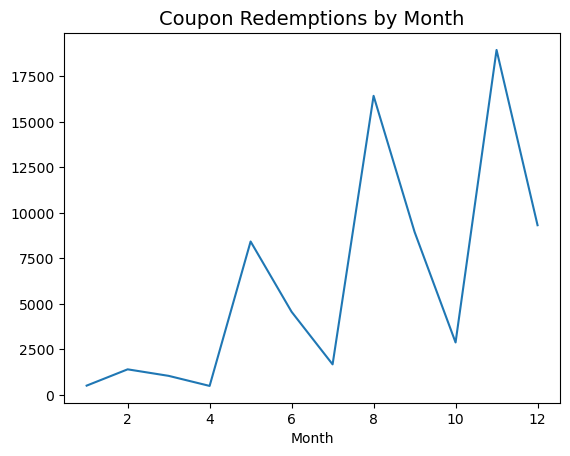

In [52]:
#Create month field from transaction date 
coupons_w_demographics['month'] = coupons_w_demographics['transaction_timestamp'].dt.month

#Calculate the number of coupon redemptions for each month 
redemptions_per_month = coupons_w_demographics.groupby('month', as_index=False)['redemption_date'].count()

#Create line chart
plt.figure()
sns.lineplot(x='month', y = 'redemption_date', data = redemptions_per_month)
plt.title("Coupon Redemptions by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel(None)
plt.show()

We see that overall, coupon redemptions are higher in the second half of the year than the first half of the year. More specifically, redemptions are at their lowest in April and at their highest in November. Since Thanksgiving is a major holiday with lots of cooking, it makes sense that more shoppers would be looking to redeem coupons around this time. Although there are peaks around May and August as well, the number of redemptions drops sharply again in July and October. In order to combat this decline, Regork could try to offer more coupons associated with other holidays, like the Fourth of July or Halloween, to boost redemptions and therefore, overall sales.  

### Average Sales Value of Purchases With vs. Without Coupons
Finally, we compared average sales value for purchases with and without coupons in order to determine which type of transactions create more revenue. 

In [ ]:
#Calculate total sales value per basket
total_sales = transactions_w_coupon_info.groupby('basket_id')['sales_value'].sum().reset_index()

#Determine if a transaction used a coupon
transactions_w_coupon_info['coupon_used'] = np.where(transactions_w_coupon_info['coupon_upc'].notna(), 1, 0)
coupon_used = transactions_w_coupon_info.groupby('basket_id')['coupon_used'].max().reset_index()

#Join data frames 
purchase_summary = total_sales.merge(coupon_used, on='basket_id')

#Compute mean sales value for transactions with/without coupons
avg_sales = purchase_summary.groupby('coupon_used')['sales_value'].mean()

table = avg_sales.reset_index()
table.columns = ['Coupon Used', 'Average Sales Value']
table.style.hide(axis="index")

Coupon Used,Average Sales Value
0,29.120936
1,175.123506


Based on the table above, we see that transactions with coupon redemption had an average sales value of $175, which is 6 times more than that of transactions without a coupon redemption. This means that when customers use coupons while shopping, they actually end up spending more at Regork. 

### Final Recommendations
In this analysis, we explored the way that Regork customers redeem coupons in order to understand how to use coupons to grow Regork's business. We found that the demographic groups already redeeming the most coupons are 45-54 year olds, the 50-74K income level, and 2-person households. Also, coupon redemptions increase in the second half of the year, with November being the highest month. Lastly, transactions with at least one coupon redemption had a higher average sales value than those with no coupons. 

Therefore, Regork should focus on offering more coupons that appeal to customers outside of these groups, like college students or families with children, and offer them at other points in the year, like July and October. Although it may seem counterintuituve for a business to continuously offer more discounts, we see that customers who redeem coupons actually end up spending more. If customers receive more coupons to Regork, they may percieve the store as being a better deal than others. This will lead them to do more of their shopping at Regork, which will generate more revenue in the long run. 

For future study, it would be interesting to dive deeper into demographic groups to see how coupon usage varies. For example, how do factors like household size and age interact? We can infer that the spending habits of an elderly couple would be different than of a single parent and child, so the coupons targeted to each group should vary as well. As we examine the data on a more granular level, we can find deeper insights and further develop Regork's marketing strategy. 